In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn import metrics

import joblib
import pandas as pd
import numpy as np
import re
import os
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv("../traindata_2020_afterCovid.csv")
df_test = pd.read_csv("../testdata_2021_afterCovid.csv")

In [3]:
# train set
reviews_train = list(df_train["clean_review"])
sentiments_train = list(df_train["sentiment"])
# test set
reviews_test = list(df_test["clean_review"])
sentiments_test = list(df_test["sentiment"])

In [4]:
# tfidf embedding
vectorizer = TfidfVectorizer(min_df = 0.0, analyzer='char', sublinear_tf=True, ngram_range=(1,3), max_features=5000)

X_train = vectorizer.fit_transform(reviews_train)
y_train = np.array(sentiments_train)

X_test = vectorizer.transform(reviews_test)
y_test = np.array(sentiments_test)

In [5]:
lgs = LogisticRegressionCV(cv=5)
lgs.fit(X_train, y_train)

lgs_pred = lgs.predict(X_test)

C:\Users\Life\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Life\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

C:\Users\Life\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Life\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [6]:
print("Accuracy: %f" % accuracy_score(y_test, lgs_pred))

Accuracy: 0.886733


Text(0.5, 257.44, 'Predicted label')

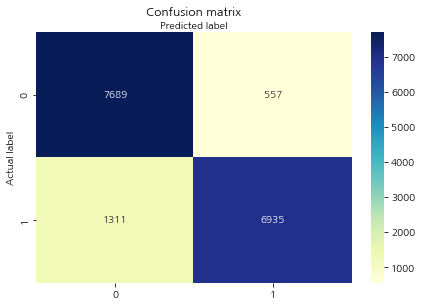

In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, lgs_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, lgs_pred))
print("Precision:",metrics.precision_score(y_test, lgs_pred))
print("Recall:",metrics.recall_score(y_test, lgs_pred))
print("F1-score:",metrics.f1_score(y_test, lgs_pred))

Accuracy: 0.8867329614358477
Precision: 0.9256540309663641
Recall: 0.8410138248847926
F1-score: 0.8813063921718135


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lgs_pred, target_names=['class low', 'class high']))

              precision    recall  f1-score   support

   class low       0.85      0.93      0.89      8246
  class high       0.93      0.84      0.88      8246

    accuracy                           0.89     16492
   macro avg       0.89      0.89      0.89     16492
weighted avg       0.89      0.89      0.89     16492



In [10]:
report = classification_report(y_test, lgs_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.854333,0.932452,0.891685,8246.000000
class high,0.925654,0.841014,0.881306,8246.000000
accuracy,0.886733,0.886733,0.886733,0.886733
macro avg,0.889994,0.886733,0.886496,16492.000000
weighted avg,0.889994,0.886733,0.886496,16492.000000


In [11]:
joblib.dump(lgs, 'lgs_TFIDF_afterCovid_0.886733')

['lgs_TFIDF_afterCovid_0.886733']